# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [1]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
data = pd.read_csv(path + '\dataset_custom.csv')



In [7]:
data = data[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin',]]

# Anforderungen 7: Dimensionalitätsreduktion

Definieren Sie für Ihren Datensatz ein oder mehrere Ziele, die Sie mit Hilfe von Dimensionsreduktion der Daten
erreichen wollen.

Führen Sie mit dem Algorithmus Ihrer Wahl eine Dimensionsreduktion auf Ihren Daten durch.

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA durchführen
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Erklärte Varianz pro Principal Component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()


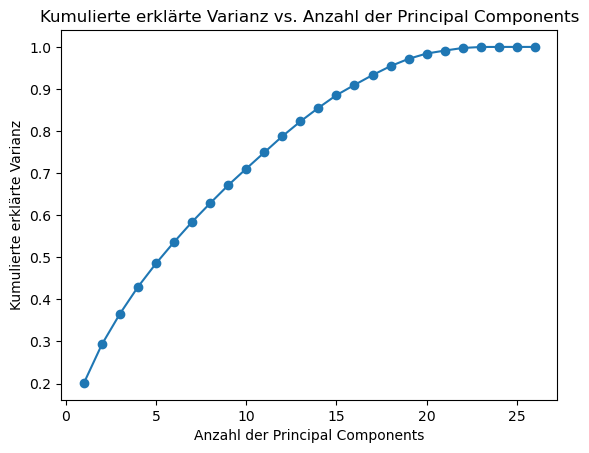

In [5]:
# Visualisierung der kumulierten erklärten Varianz
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Anzahl der Principal Components')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz vs. Anzahl der Principal Components')
plt.show()

In [11]:
principal_components.shape

(991289, 7)

Setzen Sie ggf. die Parameter des Algorithmus zur Dimensionsreduktion mit Hilfe einer Pipeline.

In [12]:
data.shape

(991289, 7)

Beschreiben Sie Ihre Ergebnisse. Haben Sie Ihr(e) Ziel(e) erreicht?